## **DTS Data Science** 
# Institut Teknologi Sepuluh Nopember (Kelas B)


## **Challenge 2** - Clustering



## **Nutrition Facts for McDonald's Menu**

**Introduction**

Ray Kroc ingin membangun sistem restoran yang terkenal akan penyediaan makanan dengan kualitas tinggi dan metode persiapan yang seragam. Dia ingin menyajikan burger, roti, kentang goreng, dan minuman yang rasanya sama di Alaska seperti di Alabama. Untuk mencapai ini, dia memilih jalan yang unik: membujuk baik pemegang waralaba dan pemasok untuk membeli visinya, bekerja bukan untuk McDonald's tetapi untuk diri mereka sendiri, bersama dengan McDonald's. Banyak item menu paling terkenal McDonald's - Seperti Big Mac, Filet-O-Fish, dan Egg McMuffin dibuat oleh franchisee

**Nutrition Facts for McDonald's Menu Dataset** memberikan analisis nutrisi untuk setiap item menu di menu McDonald's AS, termasuk menu sarapan, burger daging sapi, sandwich ayam dan ikan, kentang goreng, salad, soda, kopi dan teh, milkshake, dan makanan penutup.

## Data Acquisition

Melakukan import library yang diperlukan

In [ ]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Import Data Set

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving menu.csv to menu.csv


In [ ]:
import io
mcdata = pd.read_csv(io.BytesIO(data_to_load['menu.csv']))
mcdata

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300.0,120.0,13.0,20.0,5.0,25.0,0.0,260.0,87.0,750.0,31.0,31.0,10.0,4.0,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,25.0,8.0,770.0,32.0,30.0,10.0,4.0,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370.0,200.0,23.0,35.0,8.0,42.0,0.0,45.0,15.0,780.0,33.0,29.0,10.0,4.0,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450.0,250.0,28.0,43.0,10.0,52.0,0.0,285.0,95.0,860.0,36.0,30.0,10.0,4.0,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400.0,210.0,23.0,35.0,8.0,42.0,0.0,50.0,16.0,880.0,37.0,30.0,10.0,4.0,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510.0,150.0,17.0,26.0,9.0,44.0,0.5,45.0,14.0,280.0,12.0,80.0,27.0,1.0,4.0,64.0,12.0,15.0,0.0,40.0,8.0
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690.0,200.0,23.0,35.0,12.0,58.0,1.0,55.0,19.0,380.0,16.0,106.0,35.0,1.0,5.0,85.0,15.0,20.0,0.0,50.0,10.0
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340.0,100.0,11.0,17.0,6.0,29.0,0.0,30.0,9.0,190.0,8.0,53.0,18.0,1.0,2.0,43.0,8.0,10.0,0.0,25.0,6.0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810.0,290.0,32.0,50.0,15.0,76.0,1.0,60.0,20.0,400.0,17.0,114.0,38.0,2.0,9.0,103.0,21.0,20.0,0.0,60.0,6.0


Berdasarkan tabel di atas, kami memiliki beberapa fitur yang menjelaskan fakta nutrisi dari semua item di menu. Mari kita lihat apakah ada nilai null dan apakah semua tipe data fitur sudah benar?

## Data Exploration

Pengecekan data

In [ ]:
mcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           249 non-null    object 
 2   Serving Size                   249 non-null    object 
 3   Calories                       249 non-null    float64
 4   Calories from Fat              249 non-null    float64
 5   Total Fat                      249 non-null    float64
 6   Total Fat (% Daily Value)      249 non-null    float64
 7   Saturated Fat                  249 non-null    float64
 8   Saturated Fat (% Daily Value)  249 non-null    float64
 9   Trans Fat                      249 non-null    float64
 10  Cholesterol                    249 non-null    float64
 11  Cholesterol (% Daily Value)    249 non-null    float64
 12  Sodium                         249 non-null    flo

Dari informasi di atas, dapat diketahui bilamana ada tiga kolom data yang bertipe data bukan integer ataupun float. Sehingga perlu dilakukan perubahan tipe data dan atau penghapusan kolom yang bersangkutan.

Mencari korelasi data tiap fitur

In [ ]:
dg = mcdata.drop(['Serving Size','Category','Item'], axis=1)
dz = dg.corr()
dz

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,0.712309,0.713415,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,0.846624,0.847276,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,0.846158,0.846780,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,0.846728,0.847368,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,0.584075,0.585323,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,0.588694,0.589958,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,0.187580,0.188339,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,0.624362,0.624743,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,0.623320,0.623720,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167
Sodium,0.712309,0.846624,0.846158,0.846728,0.584075,0.588694,0.187580,0.624362,0.623320,1.000000,0.999929,0.200796,0.201032,0.694389,0.689995,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593


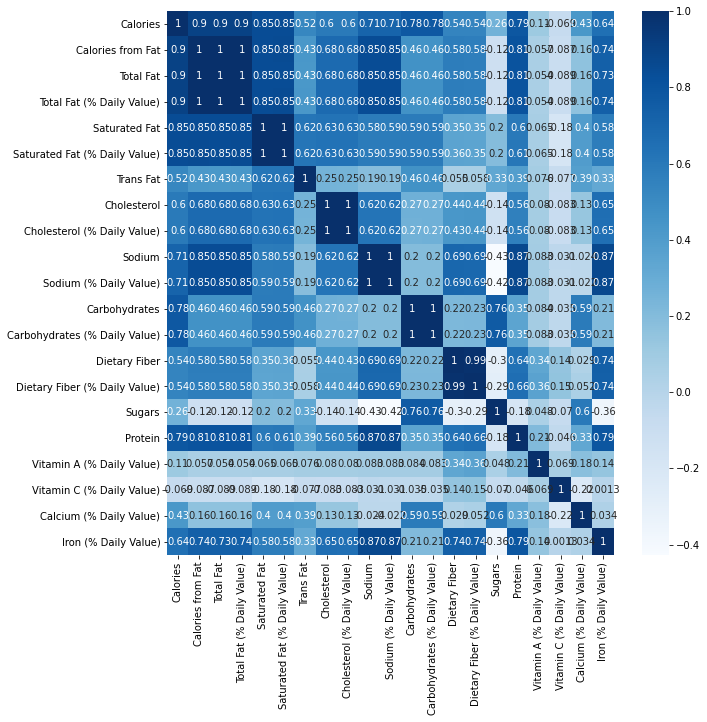

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dz, cmap='Blues', annot=True,)
plt.show()

Dari heat map di atas, dapat kita ketahui bahwa Fat memiliki korelasi paling tinggi dengan kalori, diikuti oleh protein pada urutan kedua (0.79) dan pada urutan ketiga, karbohidrat (0.78). Selain itu korelasi dengan kalori, ada korelasi yang tinggi dengan fitur lain, misalnya sodium dan iron (0.87), sodium dengan protein (0.87), dan sodium dengan kalori (0.71)

# Klasterisasi dengan menggunakan K-Means

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan dengan pengelompokan data menggunakan sistem partisi.
Terdapat dua jenis data clustering yang sering dipergunakan dalam proses pengelompokan data yaitu Hierarchical dan Non-Hierarchical, dan K-Means merupakan salah satu metode data clustering non-hierarchical atau Partitional Clustering. 

Untuk memproses data algoritma K-means Clustering , data dimulai dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid.

In [ ]:
df = mcdata.drop(['Serving Size'], axis=1)
#df = mcdata.drop(['Serving Size','Category','Item'], axis=1)
#,'Total Fat','Saturated Fat','Trans Fat'
df

NameError: ignored

Normalisasi dan perubahan data frame menjadi array

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,2:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.28468361, -0.05559952, -0.0821929 , ...,  0.23705644,
         0.83448094,  1.4992807 ],
       [-0.49318428, -0.44735768, -0.43483572, ...,  0.23705644,
         0.0304813 ,  1.4992807 ],
       [ 0.00721733,  0.57121352,  0.62309274, ...,  0.23705644,
         0.26019549,  1.4992807 ],
       ...,
       [-0.11788307, -0.21230278, -0.22325003, ...,  0.23705644,
        -0.19923288, -0.52047568],
       [ 1.84202322,  1.2763782 ,  1.25784981, ...,  2.2974324 ,
        -0.19923288, -0.52047568],
       [ 0.17401787,  0.17945537,  0.12939279, ...,  0.53139586,
        -0.42894706, -0.52047568]])

Setelah itu, kita akan menentukan jumlah klasternya, misalnya disini kita memilih 3 klaster. Jumlah klaster ini bebas tergantung peneliti.

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 2 2 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [ ]:
df["Clus_km"] = labels
df.head(5)

,Category,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Clus_km
0,Breakfast,Egg McMuffin,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,0
1,Breakfast,Egg White Delight,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,0
2,Breakfast,Sausage McMuffin,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,0
3,Breakfast,Sausage McMuffin with Egg,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,0
4,Breakfast,Sausage McMuffin with Egg Whites,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,0


In [ ]:
df.groupby('Clus_km').mean()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,478.701299,216.233766,24.038961,37.051948,8.616883,43.246753,0.305195,101.753247,33.896104,1136.233766,47.337662,42.090909,14.012987,2.792208,11.259740,7.155844,23.818182,18.831169,8.350649,17.597403,17.142857
1,289.715909,70.596591,7.903409,12.153409,4.428977,21.960227,0.161932,24.062500,8.136364,144.630682,6.056818,47.636364,15.880682,0.965909,3.840909,39.920455,7.573864,11.318182,8.767045,22.534091,2.761364
2,1128.571429,567.142857,63.000000,97.142857,17.000000,85.142857,0.142857,316.428571,105.714286,2278.571429,95.000000,97.857143,32.714286,5.571429,22.142857,10.428571,43.000000,7.000000,4.714286,18.857143,29.285714


Dari tabel di atas, dapat diketahui bahwa ketika dilihat dari sisi 'calories', data dikelompokkan menjadi menu yang memiliki jumlah kalori besar (0), sedang (1), dan kecil (3).

In [ ]:
area = np.pi*( X[:, 0])**2
area

array([282743.3388230814, 196349.54084936206, 430084.03427644266,
       636172.512351933, 502654.8245743669, 580880.4816487527,
       664761.0054996002, 849486.6535306801, 528101.7250684443,
       693977.8171779853, 580880.4816487527, 723822.9473870883,
       817128.2491987052, 1020703.4531513238, 664761.0054996002,
       849486.6535306801, 528101.7250684443, 693977.8171779853,
       916088.4177867837, 664761.0054996002, 502654.8245743669,
       554176.9440932395, 950331.7777109124, 785398.1633974483,
       1207628.2160399165, 1020703.4531513238, 1410260.942196458,
       1720336.1371057706, 2010619.2982974676, 1286796.3509103793,
       1495712.2623741005, 3732526.231730033, 4154756.2843725015,
       3079074.959783356, 3463605.900582747, 384845.10006474965,
       849486.6535306801, 282743.3388230814, 70685.83470577035,
       664761.0054996002, 264207.9421669016, 212371.66338267003,
       882473.3763933729, 849486.6535306801, 1130973.3552923256,
       1168986.626400762, 91

Di sini kami mencoba untuk menampilkan hasil clustering dalam bentuk scatter plot dilihat dari sisi Calories dan Sodium.

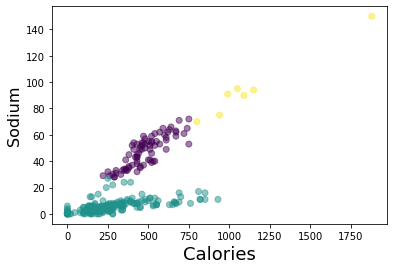

In [ ]:
lt.scatter(X[:, 0], X[:, 10], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Calories', fontsize=18)
plt.ylabel('Sodium', fontsize=16)

plt.show()


Dari scatter plot di atas dapat dilihat persebaran dari ketiga cluster, di mana terdapat satu outlier pada cluster ketiga (2) dengan jumlah kalori dan sodium tinggi.

In [ ]:
mcd_dat = df.groupby('Clus_km').count()
mcd_dat

,Category,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Clus_km,,,,,,,,,,,,,,,,,,,,,,,
0,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
1,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
2,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
agg_mcdata = df.groupby(['Clus_km'])['Calories','Sodium'].count()
agg_mcdata

NameError: ignored

Dari tabel di atas, dapat diketahui jumlah item yang berada pada masing-masing cluster, di mana cluster 1 (kandungan Calories dan Sodium rendah)

# Klasterisasi dengan menggunakan Hierarki

Dalam metode hirarki cluster terdapat dua tipe dasar yaitu agglomerative (pemusatan) dan divisive (penyebaran). Dalam metode agglomerative, setiap obyek atau observasi dianggap sebagai sebuah cluster tersendiri. Dalam tahap selanjutnya, dua cluster yang mempunyai kemiripan digabungkan menjadi sebuah cluster baru demikian seterusnya. Sebaliknya, dalam metode divisive kita beranjak dari sebuah cluster besar yang terdiri dari semua obyek atau observasi. Selanjutnya, obyek atau observasi yang paling tinggi nilai ketidakmiripannya kita pisahkan demikian seterusnya (B.J, 2009).

Fitur yang akan digunakan dalam metodi ini adalah ['Calories', 'Calories from Fat','Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat','Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol','Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)','Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber','Dietary Fiber (% Daily Value)', 'Sugars', 'Protein','Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)','Calcium (% Daily Value)', 'Iron (% Daily Value)'] sebagai representasi dari nutrisi dalam menu.

In [ ]:
featureset = mcdata.drop(['Serving Size','Category','Item'], axis=1)
featureset

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


Data dalam fitur yang telah dipilih dinormaslisasi menggunakan MinMaxScaler dengan nilai rentang antara 0-1 sehingga sebaran data tidak acak atau inkonsisten data dikarenakan tiap data dalam fitur tersebut memiliki rentang berbeda. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.15957447, 0.11320755, 0.11016949, 0.10989011, 0.25      ,
        0.24509804, 0.        , 0.45217391, 0.453125  , 0.20833333,
        0.20666667, 0.21985816, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.1954023 , 0.05882353, 0.        , 0.35714286,
        0.375     ],
       [0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.4947916

Dengan menggunakan Scipy dataset dikumpulkan dan menghitung jarak antar matrix.

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([42, 54, 42, 17, 42, 17, 16, 17, 38, 40, 38, 40, 16, 17, 38, 40, 39,
       38, 13, 40, 39, 39, 16, 38, 17, 40, 13,  6,  6, 16, 12,  1,  1,  5,
        5, 54, 39, 52, 28, 39, 33, 33, 40, 11, 11, 11, 11,  7, 52, 52, 38,
       13, 38, 38, 38, 38, 38, 41, 54, 40, 40, 40, 41, 14, 40, 52, 52, 39,
       39, 52, 40, 42, 40, 42, 14, 15, 42, 41, 28, 27, 52, 12,  2, 52, 34,
       53, 53,  4,  3,  3, 52, 52, 52, 52, 52, 52, 27, 54, 33, 28, 31, 36,
       29, 54, 29, 29, 31, 50, 49, 49, 30, 25, 26, 30, 31, 31, 31, 31, 30,
       25, 26, 30, 31, 31, 31, 31, 30, 25, 26, 30, 22, 22, 35, 35, 35, 37,
       31, 31, 31, 31, 31, 30, 30, 25, 30, 31, 31, 31, 48, 48, 46, 49, 50,
       47, 49, 50, 47, 49, 50, 47, 48, 48, 46, 22, 22, 23, 23, 23, 43, 23,
       23, 43, 23, 23, 43, 22, 22, 23, 50, 47, 45, 51, 51, 43, 50, 47, 45,
       51, 51, 43, 50, 45, 18, 51, 43, 43, 29, 29, 49, 29, 29, 49, 29, 29,
       49, 29, 29, 49, 28, 28, 29, 50, 50, 45, 49, 51, 43, 49, 50, 45, 49,
       51, 43, 44, 18, 21

Menentukan banyaknya jumlah kluster sebanyak 3 secara langsung

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 3
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3], dtype=int32)

Visualisasi dendogram hasil klusterisasi berdasarkan nilai kalori dan sodium pada setiap item menu.

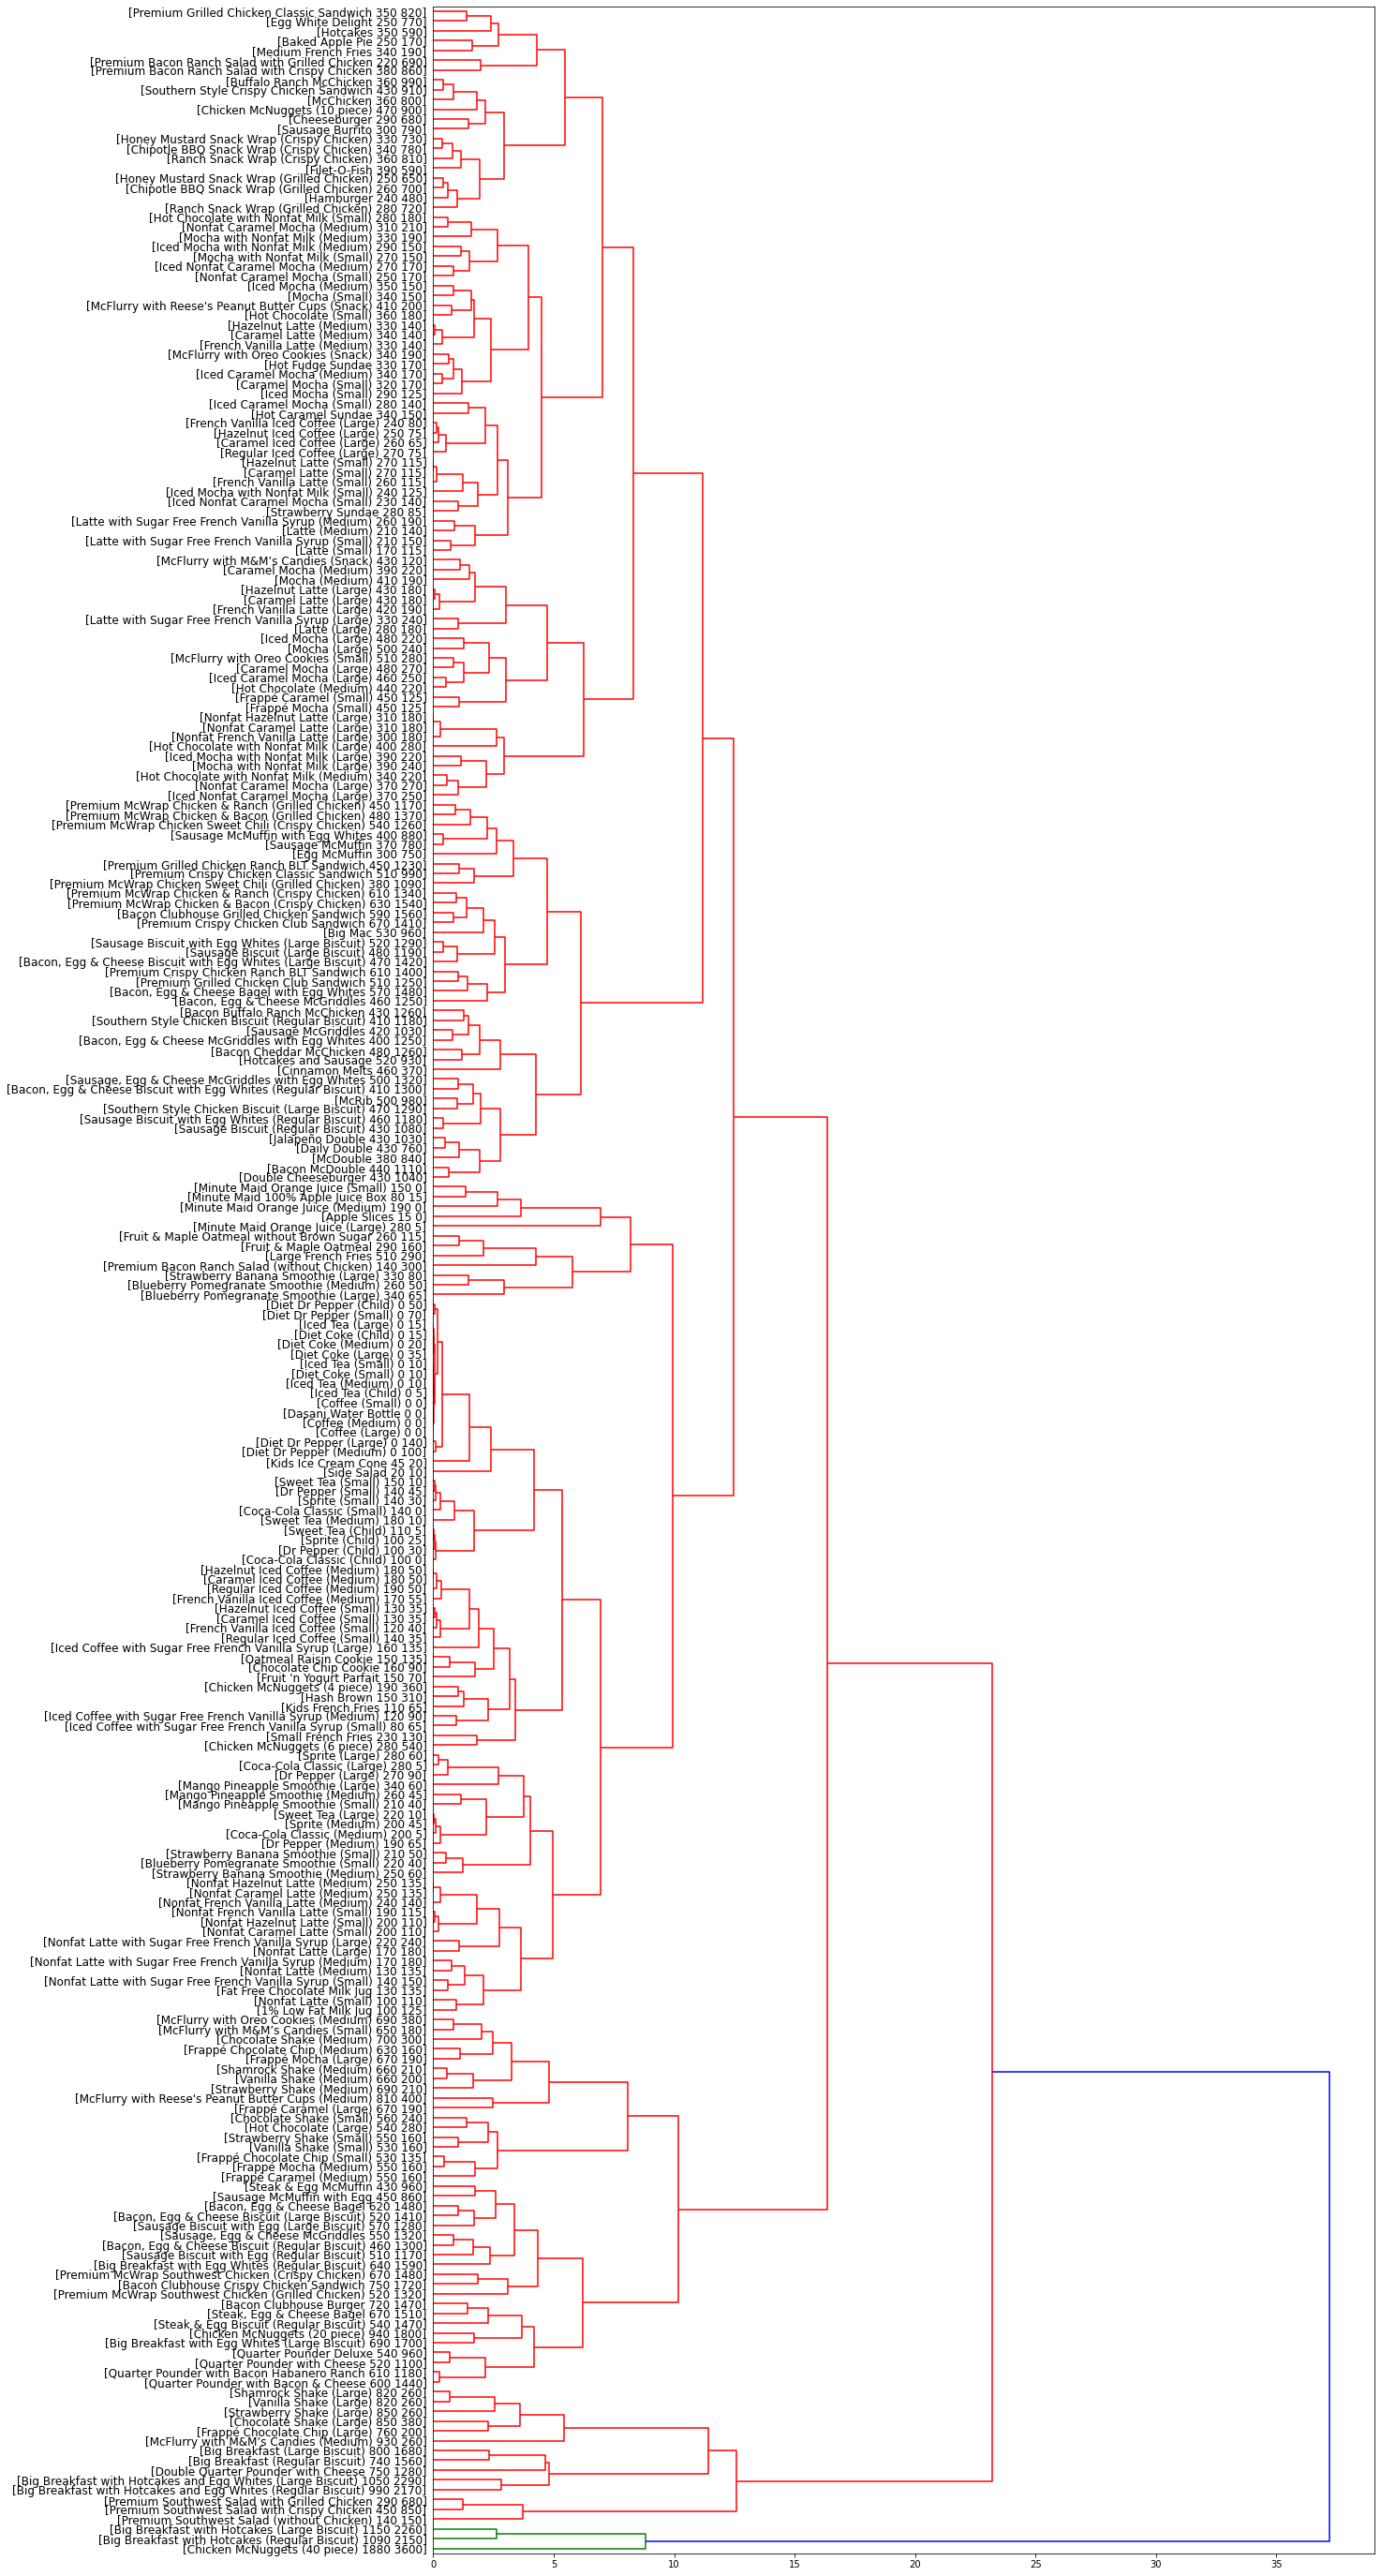

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (mcdata['Item'][id], mcdata['Calories'][id], int(float(mcdata['Sodium'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Hierarchical Clustering dapat divisualisasikan ke dalam bentuk dendogram. Hasilnya didapati bahwa beberapa item menu yang memiliki kesamaan atau kemiripan pada nilai kalori dan sodium akan diklusterkan menjadi satu.

Hierarchical Clustering juga dapat dilakukan dengan menggunakan library sckit-learn.

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.62772451 0.60764506 ... 1.03010511 1.68954627 1.03821923]
 [0.62772451 0.         0.43734272 ... 0.85887015 1.69307468 0.89008786]
 [0.60764506 0.43734272 0.         ... 0.87058536 1.50590499 0.82806786]
 ...
 [1.03010511 0.85887015 0.87058536 ... 0.         1.30141099 0.22345717]
 [1.68954627 1.69307468 1.50590499 ... 1.30141099 0.         1.12769736]
 [1.03821923 0.89008786 0.82806786 ... 0.22345717 1.12769736 0.        ]]


AgglomerativeClustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up. Kriteria keterkaitan menentukan metrik yang digunakan untuk strategi penggabungan.

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1])

Menambahkan field baru ke dalam dataframe yang merupakan hasil dari klusterisasi pada kolom "cluster_ ".

In [ ]:
mcdata['cluster_'] = agglom.labels_
mcdata.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),cluster_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,1
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,1
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,1
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,1
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Sodium')

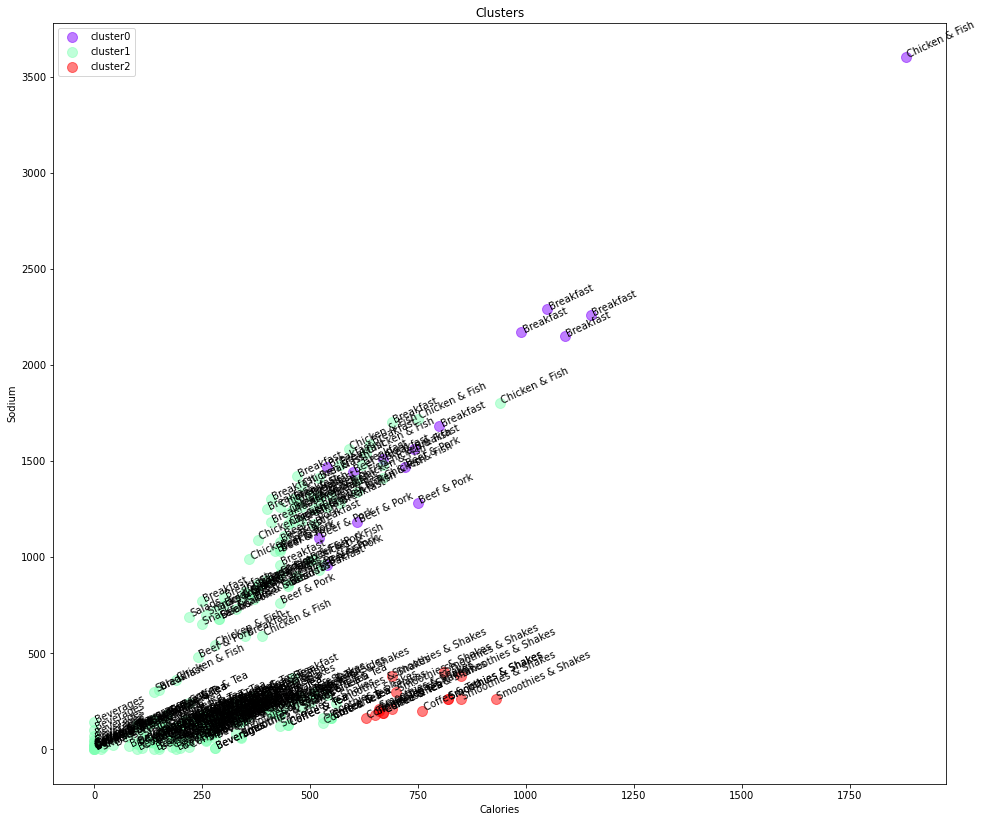

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = mcdata[mcdata.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Calories[i], subset.Sodium[i],str(subset['Category'][i]), rotation=25) 
    plt.scatter(subset.Calories, subset.Sodium, s=100, c=color, label='cluster'+str(label),alpha=0.5)       
#    plt.scatter(subset.Calories, subset.Sodium, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.Calories, subset.Sodium)
plt.legend()
plt.title('Clusters')
plt.xlabel('Calories')
plt.ylabel('Sodium')

Distribusi setiap kluster dapat dilihat melalui scatter plot

In [ ]:
mcdata.groupby(['cluster_','Category'])['cluster_'].count()

cluster_  Category          
0         Beef & Pork            6
          Breakfast              8
          Chicken & Fish         1
1         Beef & Pork            9
          Beverages             27
          Breakfast             34
          Chicken & Fish        26
          Coffee & Tea          91
          Desserts               7
          Salads                 6
          Smoothies & Shakes    16
          Snacks & Sides        13
2         Coffee & Tea           4
          Smoothies & Shakes    12
Name: cluster_, dtype: int64

In [ ]:
mcdata.groupby(['cluster_'])['cluster_'].count()

cluster_
0     15
1    229
2     16
Name: cluster_, dtype: int64

Dari hasil klasterisasi diketahui bahwa Klaster[0] terdiri dari 15 item menu, Klaster[1] terdiri dari 229 item menu, dan Klaster[2] terdiri dari 156item menu.

In [ ]:
agg_mcdata = mcdata.groupby(['cluster_'])['Calories','Sodium'].mean()
agg_mcdata

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Calories,Sodium
cluster_,,
0,843.333333,1741.333333
1,311.091703,431.157205
2,741.250000,252.500000


Untuk klasterisasi menu tersebut dapat disimpulkan bahwa Klaster[0] memiliki tingkat kalori tinggi dan sodium tinggi, Klaster[1] memiliki tingkat kalori rendah dan sodium tsedang, dan Klaster[2] memiliki tingkat kalori sedang dan sodium rendah,